In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('seeds_dataset.csv')

In [2]:
df.head()

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [3]:
df.describe()

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove,Class
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000,206.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529,2.084039
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330,0.948211
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000,1.000000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000,1.000000
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000,2.000000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000,5.439000


#### Removing rows which has Class values as empty

In [4]:
df['Class'].replace('', np.nan, inplace=True)

In [5]:
df.dropna(subset=['Class'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 209
Data columns (total 8 columns):
Area                       206 non-null float64
Perimeter                  206 non-null float64
Compactness                203 non-null float64
Length_of_Kernel           206 non-null float64
Width_of_Kernel            205 non-null float64
Asymmetry_Coefficient      206 non-null float64
Length_of_Kernel_Groove    202 non-null float64
Class                      206 non-null float64
dtypes: float64(8)
memory usage: 14.5 KB


Class:

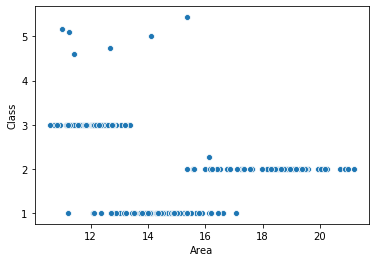

In [7]:
sns.scatterplot(x="Area", y="Class", data=df)

In [8]:
uv = np.percentile(df.Class, [98][0])
uv

4.7312

In [9]:
df.Class[(df.Class > 3)] = 3

In [10]:
df.Class[(df.Class >2)&(df.Class <2.5)] = 2

In [11]:
df.describe()

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove,Class
count,206.000000,206.000000,203.000000,206.000000,205.000000,206.000000,202.000000,206.000000
mean,14.858204,14.565583,0.871169,5.565198,3.282966,3.682375,5.408173,2.024272
std,2.909853,1.306601,0.023292,0.724167,0.420538,1.462391,0.533085,0.817130
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000,1.000000
25%,12.270000,13.452500,0.857700,5.253000,2.956000,2.600250,5.045250,1.000000
50%,14.360000,14.320000,0.873500,5.518000,3.258000,3.599000,5.226000,2.000000
75%,17.305000,15.715000,0.887500,5.979750,3.566000,4.768750,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.315000,6.735000,3.000000


Length_of_Kernel_Groove:

In [12]:
df.Length_of_Kernel_Groove = df.Length_of_Kernel_Groove.fillna(df.Length_of_Kernel_Groove.mean())

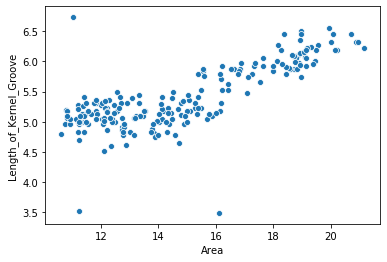

In [13]:
sns.scatterplot(x="Area", y="Length_of_Kernel_Groove", data=df)

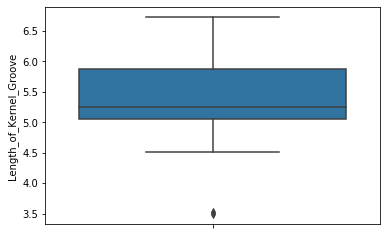

In [14]:
sns.boxplot(y="Length_of_Kernel_Groove", data=df)

In [15]:
lv = np.percentile(df.Length_of_Kernel_Groove, [1][0])
lv

4.5233

In [16]:
df.Length_of_Kernel_Groove[(df.Length_of_Kernel_Groove) < lv] = lv

Asymmetry_Coefficient:

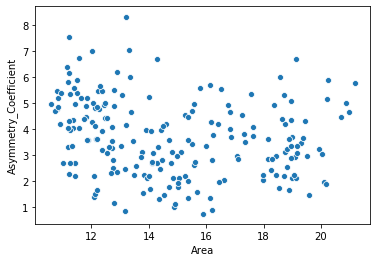

In [17]:
sns.scatterplot(x="Area", y="Asymmetry_Coefficient", data=df)

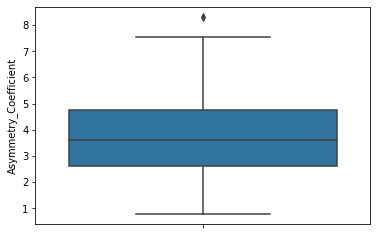

In [18]:
sns.boxplot(y="Asymmetry_Coefficient", data=df)

In [19]:
uv = np.percentile(df.Asymmetry_Coefficient, [99][0])
uv

7.03285

In [20]:
df.Asymmetry_Coefficient[(df.Asymmetry_Coefficient) > uv] = uv

Width_of_Kernel:

In [21]:
df.Width_of_Kernel = df.Width_of_Kernel.fillna(df.Width_of_Kernel.mean())

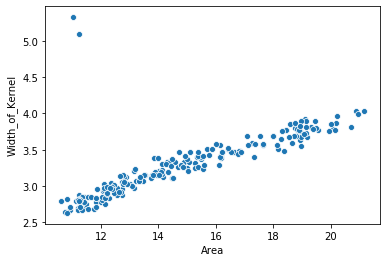

In [22]:
sns.scatterplot(x="Area", y="Width_of_Kernel", data=df)

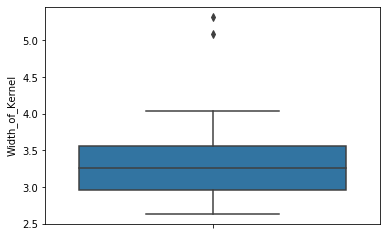

In [23]:
sns.boxplot(y="Width_of_Kernel", data=df)

In [24]:
uv = np.percentile(df.Width_of_Kernel, [99][0])
uv

4.0329500000000005

In [25]:
df.Width_of_Kernel[(df.Width_of_Kernel) >  uv] = 0.8 * uv

Length_of_Kernel:

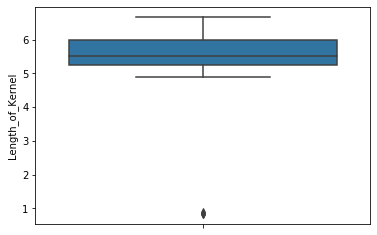

In [26]:
sns.boxplot(y="Length_of_Kernel", data=df)

In [27]:
lv = np.percentile(df.Length_of_Kernel, [1][0])
lv

1.0999499999999993

In [28]:
df.Width_of_Kernel[(df.Width_of_Kernel) < lv] = lv

Compactness:

In [29]:
df.Compactness = df.Compactness.fillna(df.Compactness.mean())

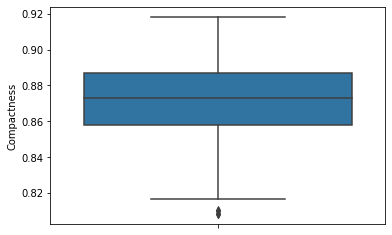

In [30]:
sns.boxplot(y="Compactness", data=df)

In [31]:
lv = np.percentile(df.Compactness, [2][0])
lv

0.81701

In [32]:
df.Compactness[(df.Compactness) < lv] = lv

Perimeter:

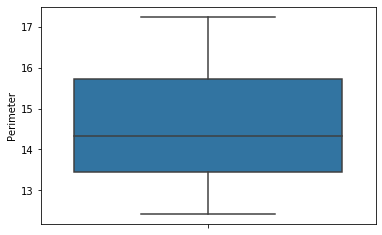

In [33]:
sns.boxplot(y="Perimeter", data=df)

Area:

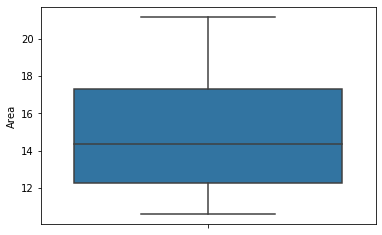

In [34]:
sns.boxplot(y="Area", data=df)

In [35]:
df

,Area,Perimeter,Compactness,Length_of_Kernel,Width_of_Kernel,Asymmetry_Coefficient,Length_of_Kernel_Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.22100,5.220000,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.01800,4.956000,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.69900,4.825000,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.25900,4.805000,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.35500,5.175000,1.0
5,14.38,14.21,0.8951,5.386,3.312,2.46200,4.956000,1.0
6,14.69,14.49,0.8799,5.563,3.259,3.58600,5.219000,1.0
7,14.11,14.10,0.8911,5.420,3.302,2.70000,5.408173,3.0
8,16.63,15.46,0.8747,6.053,3.465,2.04000,5.877000,1.0
9,16.44,15.25,0.8880,5.884,3.505,1.96900,5.533000,1.0


### Logistic Regression :

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
x = df.iloc[:,df.columns != 'Class']
y = df['Class']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(164, 7) (42, 7) (164,) (42,)


In [44]:
clf_LR = LogisticRegression()

In [45]:
clf_LR.fit(x_train, y_train)

/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rameshveer/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_test_pred = clf_LR.predict(x_test)

In [49]:
clf_LR.predict_proba(x)

array([[8.66284844e-01, 1.23387618e-01, 1.03275387e-02],
       [9.41712678e-01, 5.50532786e-02, 3.23404358e-03],
       [8.81787519e-01, 9.09805805e-02, 2.72319003e-02],
       [9.30174640e-01, 3.30103759e-02, 3.68149836e-02],
       [7.19247520e-01, 2.80094084e-01, 6.58396475e-04],
       [8.89065928e-01, 8.37195618e-02, 2.72145100e-02],
       [6.86078978e-01, 2.00315024e-01, 1.13605998e-01],
       [6.57480551e-01, 1.34442274e-01, 2.08077175e-01],
       [4.30992539e-01, 5.65033611e-01, 3.97384984e-03],
       [5.78215726e-01, 4.19977248e-01, 1.80702570e-03],
       [4.23551965e-01, 4.33581420e-01, 1.42866616e-01],
       [9.39847360e-01, 3.21429760e-02, 2.80096638e-02],
       [8.03697840e-01, 6.10539910e-02, 1.35248169e-01],
       [8.57889743e-01, 3.39825922e-02, 1.08127665e-01],
       [8.86292388e-01, 2.82522852e-02, 8.54553268e-02],
       [7.43373736e-01, 1.94059205e-01, 6.25670592e-02],
       [4.03247572e-01, 2.47693191e-01, 3.49059237e-01],
       [7.72370383e-01, 2.26264

In [50]:
y_pred = clf_LR.predict(x)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 2., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 1., 1., 1., 1.,
       3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3.,
       3., 3.])

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y, y_pred)

array([[57,  5,  4],
       [ 2, 67,  0],
       [ 4,  1, 66]])

In [81]:
y_pred_33 = (clf_LR.predict_proba(x)[:] >= 0.33)
y_pred_33

IndexError: too many indices for array

In [77]:
confusion_matrix(y, y_pred_33)

array([[ 0,  0,  0,  0],
       [57,  9,  0,  0],
       [69,  0,  0,  0],
       [ 3, 68,  0,  0]])

In [58]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

In [59]:
y_pred_test = clf_LR.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred_test)

0.9285714285714286

In [67]:
precision_score(y_test,y_pred_test, average=None)

array([0.85714286, 0.92307692, 1.        ])

In [68]:
recall_score(y_test,y_pred_test, average=None)

array([0.92307692, 0.92307692, 0.9375    ])

### Linear Discriminant Analysis

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
clf_lda = LinearDiscriminantAnalysis()

In [71]:
clf_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [72]:
y_pred_lda = clf_lda.predict(x_test)
y_pred_lda

array([1., 3., 1., 1., 3., 3., 2., 3., 2., 1., 1., 2., 1., 1., 1., 3., 2.,
       3., 2., 3., 2., 2., 2., 3., 3., 3., 3., 2., 3., 2., 3., 1., 2., 3.,
       2., 1., 3., 1., 1., 2., 1., 1.])

In [73]:
confusion_matrix(y_test, y_pred_lda)

array([[12,  1,  0],
       [ 1, 12,  0],
       [ 1,  0, 15]])

In [75]:
accuracy_score(y_test, y_pred_lda)

0.9285714285714286

In [83]:
from sklearn.metrics import f1_score

In [85]:
f1_score(y_test, y_pred_test, average=None)

array([0.88888889, 0.92307692, 0.96774194])